In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [97]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

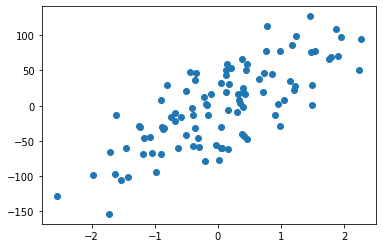

In [98]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [99]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [100]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [101]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

### Сначала вручную

In [8]:
# шаг алгоритма
alpha = 0.01

In [107]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
        print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

(100, 1)
[[1.         6.18693802]
 [1.         2.47034915]
 [1.         1.42013331]
 [1.         0.87305123]
 [1.         4.51206231]]
[1 0 0 0 1]


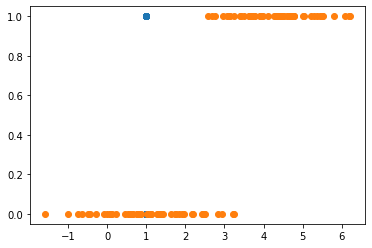

In [25]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=1, random_state=0)
print(X.shape)

X = np.c_[ np.ones(100), X]
print(X[:5])
print(y[:5])
pylab.plot(X, y, 'o')
pylab.show()

In [13]:
# функция сигмоиды
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Кросс-Эндропия 
# для логистической регрессии T - целевая переменная отнесения к классу 1 или 0 
# Y – результат логистической регрессии.
def cross_entropy(N, T, Y):
    return -1/N * np.sum(T * np.log(Y) + (1 - T) * np.log(1 - Y))

def gradient_log_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. 
    Логистическая регрессия - и функция потерь кросс-энтропия
    На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = sigmoid(np.dot(x, theta)) # матричное произведение
        J = cross_entropy(m, y, hypothesis)
        #print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, hypothesis - y) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

In [14]:
%%time
theta = gradient_log_descent_2(alpha, X, y, 1000)

Wall time: 48 ms


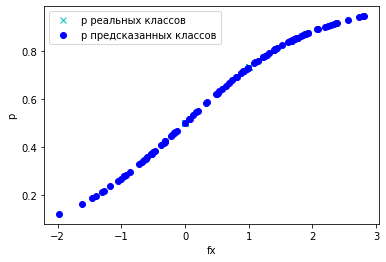

In [26]:
# построим полученную линию из theta
for i in range(X.shape[1]):
    y_predict = theta[0] + theta[1]*X 
    
#print(y_predict[:5])
# определим вероятность классов
# сигмоида для предсказаний
p = []
#print(y_predict.T)
for fx in y_predict.T[1]:
    logit = sigmoid(fx)
    p.append(logit)

# сигмоида для исходных значений 
p_orig = []

for fx in y:
    logit = sigmoid(fx)
    p_orig.append(logit)

# рисуем результат
pylab.plot(y, p_orig,'x', color='c', label='p реальных классов')
pylab.plot(y_predict.T[1],p,'o', color='b', label='p предсказанных классов')
pylab.xlabel('fx')
pylab.ylabel('p')
pylab.legend(loc='upper left')
pylab.show()

### Используем готовые методы

In [27]:
from sklearn import linear_model

In [28]:
model = linear_model.SGDRegressor( alpha = 0.01, max_iter = 1000 )

In [29]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [30]:
%%time 

model.fit( x, y )

CPU times: user 1.68 ms, sys: 1.96 ms, total: 3.64 ms
Wall time: 6.21 ms


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [31]:
model.intercept_, model.coef_

(array([-2.75589977]), array([42.65548276]))

In [32]:
y_predict_sgd = model.predict( x )

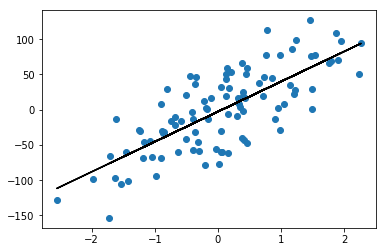

In [33]:
pylab.plot(x, y, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()